In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams.update({'font.size': 18}) # Set global font size to 12, adjust as needed

In [3]:
!pip install openpyxl

In [4]:
# Load the data from the Excel file
file_path = './Research Park Electricity bills.xlsx'
research_park_consumption = pd.read_excel(file_path)

# Clean and prepare the data for plotting
research_park_consumption.columns = research_park_consumption.iloc[0]  # Set the first row as the header
research_park_consumption = research_park_consumption.drop(0)  # Drop the header row from the dataframe

# Convert 'Date' column to datetime, keeping the first date in the range for simplicity
research_park_consumption['Date'] = pd.to_datetime(research_park_consumption['Date'].str.extract(r'(.*?)-')[0] + ', ' + research_park_consumption['Date'].str[-4:], errors='coerce')
#research_park_consumption['Month'] = pd.to_datetime(research_park_consumption['Month'].str.extract(r'(.*?)-')[0] + ', ' + research_park_consumption['Date'].str[-4:], errors='coerce')
research_park_consumption['Month'] = research_park_consumption['Month'].map(str)

# Convert 'Consumption', 'Cost (no GST)', and 'Average Cost per kw/h' to numeric
research_park_consumption['Consumption'] = pd.to_numeric(research_park_consumption['Consumption'], errors='coerce')
research_park_consumption['Cost (no GST)'] = pd.to_numeric(research_park_consumption['Cost (no GST)'], errors='coerce')
research_park_consumption['Average Cost per kw/h'] = pd.to_numeric(research_park_consumption['Average Cost per kw/h'], errors='coerce')
research_park_consumption['Avg'] = pd.to_numeric(research_park_consumption['Avg'], errors='coerce')

# Drop rows with missing dates
research_park_consumption = research_park_consumption.dropna(subset=['Date'])

print(research_park_consumption)
#print("\nMax Monthly Consumption: "+str(max(research_park_consumption['Consumption']))+" kWh")
daily_max_consumption = max(research_park_consumption['Consumption'])/30
#print("Max daily consumption based on max monthly: "+str(daily_max_consumption)+" kWh")

0        Date  Consumption  Cost (no GST)  Average Cost per kw/h Month  \
1  2019-05-01        60151       13252.72                  0.305   Jan   
2  2019-06-01        76922       16752.32                  0.230   Feb   
3  2019-07-01       117715       25435.23                  0.210   Mar   
4  2019-08-01        93960       14409.09                  0.155   Apr   
5  2019-09-01        66786       16107.83                  0.285   May   
6  2019-10-01       212701       45988.60                  0.215   Jun   
7  2019-11-01       169746       27271.24                  0.160   Jul   
8  2019-12-01        51563       10145.83                  0.460   Aug   
9  2020-01-01        57396       11696.75                  0.420   Sep   
10 2020-02-01        49893       11405.72                  0.975   Oct   
11 2020-03-01        57474       12381.14                  0.370   Nov   
12 2020-04-01        42157        8984.81                  0.885   Dec   
13 2020-05-01        64260       14479

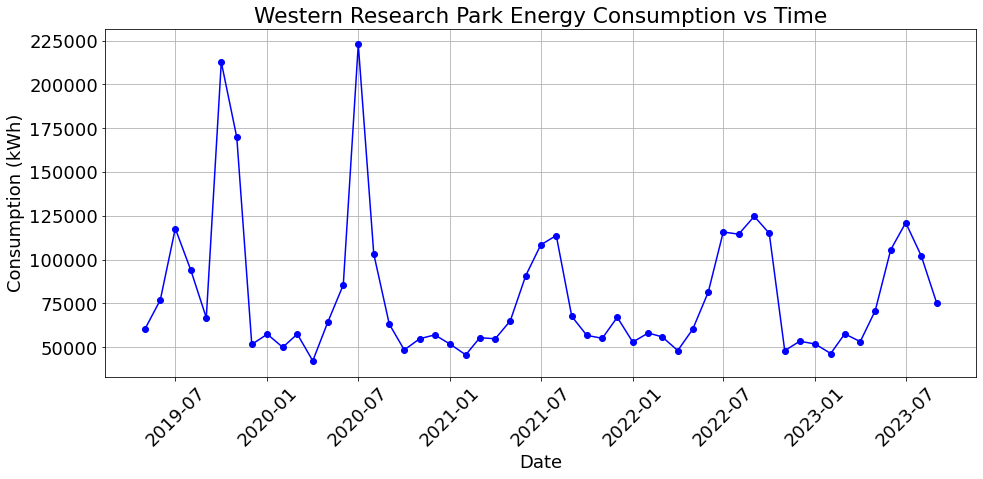

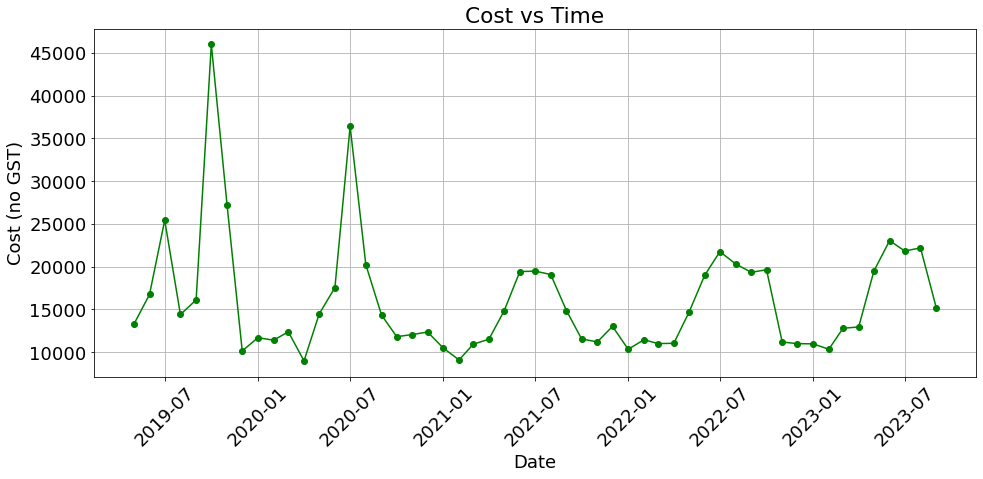

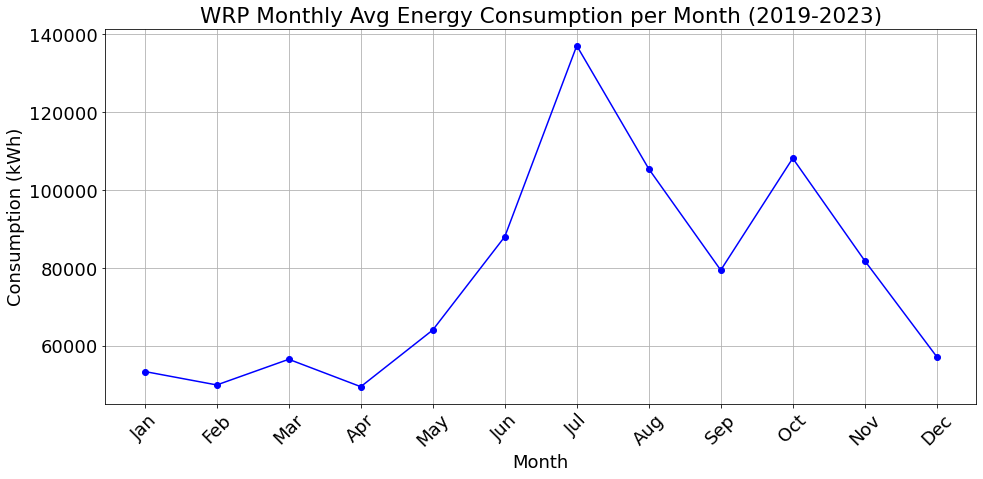

In [5]:


# Plot energy consumption vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Date'], research_park_consumption['Consumption'], marker='o', linestyle='-', color='blue')
plt.title('Western Research Park Energy Consumption vs Time')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot cost vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Date'], research_park_consumption['Cost (no GST)'], marker='o', linestyle='-', color='green')
plt.title('Cost vs Time')
plt.xlabel('Date')
plt.ylabel('Cost (no GST)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot average cost vs time
#plt.figure(figsize=(14, 7))
#plt.plot(research_park_consumption['Date'], research_park_consumption['Average Cost per kw/h'], marker='o', linestyle='-', color='red')
#plt.title('Average Cost per kWh vs Time')
#plt.xlabel('Date')
#plt.ylabel('Average Cost per kWh')
#plt.grid(True)
#plt.xticks(rotation=45)
#plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
#plt.show()

# Plot energy consumption vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Month'], research_park_consumption['Avg'], marker='o', linestyle='-', color='blue')
plt.title('WRP Monthly Avg Energy Consumption per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

## Consumption vs Generation

In [6]:
PV = 0.575 # [kW]
yH = 1166 #yearly generation hours
mH = [66,92,109,115,119,124,125,118,104,85,56,52] #monthly generation hours Jan - Dec
cost = 400 # approximate $/kW per CANSOLAR
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

genArea = [2381+2349,2381+2349+2215,2381+2349+4615+2215,2381+2349+4089+2215+4615,2381+2349+7891+2215+4615,2381+2349+7891+2215+4615+4089] #combinations of rooftop and parking lot areas
pArea = 2.278 * 1.134 # [m^2]
numPanels = [i * 0.8 / pArea for i in genArea] # number of panels (unrounded)

gen = [i * PV for i in numPanels] # generation for each surface area configuration [kW]

totGen1 = [i * gen[0] for i in mH] # generation for surface area configuration 1 for each mounth [kWh]
totGen2 = [i * gen[1] for i in mH] # generation for surface area configuration 2 for each mounth [kWh]
totGen3 = [i * gen[2] for i in mH] # generation for surface area configuration 3 for each mounth [kWh]
totGen4 = [i * gen[3] for i in mH] # generation for surface area configuration 4 for each mounth [kWh] 
totGen5 = [i * gen[4] for i in mH] # generation for surface area configuration 5 for each mounth [kWh]
totGen6 = [i * gen[5] for i in mH] # generation for surface area configuration 5 for each mounth [kWh]

wrp = [53426.50,49977.50,56568.00,49531.75,64092.80,88062.40,137115.60,105491.40,79462.60,108207.75,81892.25,57238.75] # average power consumption for the WRP from excel file

diff1 = np.subtract(totGen1,wrp)
diff2 = np.subtract(totGen2,wrp)
diff3 = np.subtract(totGen3,wrp)
diff4 = np.subtract(totGen4,wrp)
diff5 = np.subtract(totGen5,wrp)
diff6 = np.subtract(totGen6,wrp)

sys = [i * PV for i in numPanels]

print(sys)

[842.2716792631923, 1236.6970005249198, 2058.490615704546, 2786.619346467166, 3463.6419520821046, 4191.770682844724]


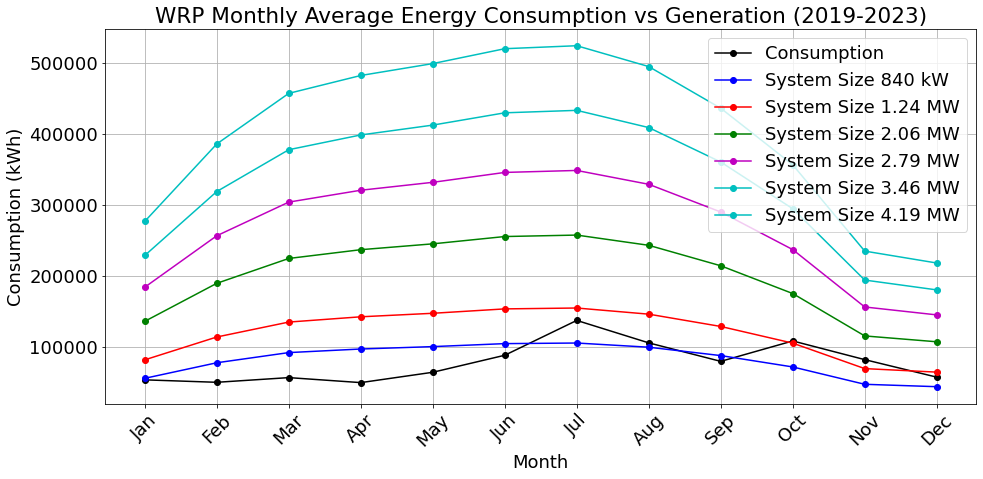

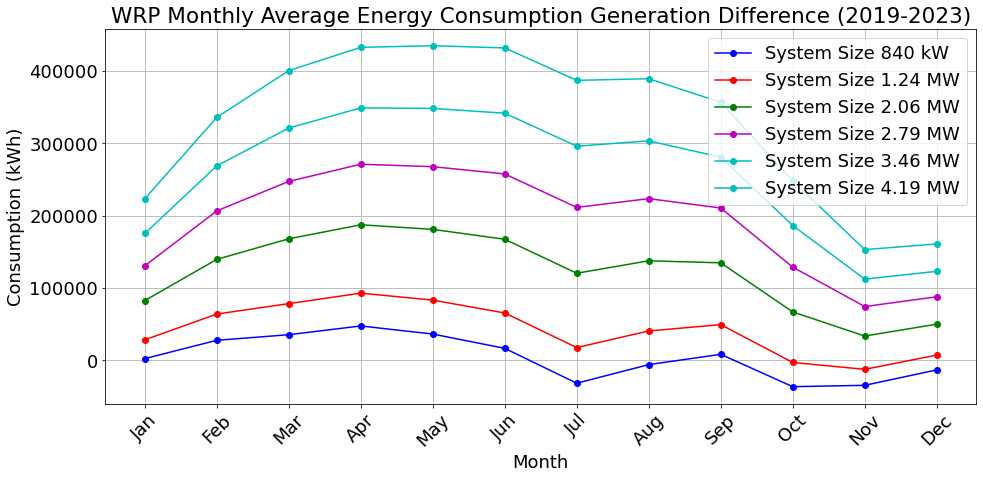

In [7]:
#Plot of the power generated for each configuration and the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('WRP Monthly Average Energy Consumption vs Generation (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(research_park_consumption['Month'], research_park_consumption['Avg'], marker='o', linestyle='-', color='k', label='Consumption')
ax1.plot(months, totGen1, marker='o', linestyle='-', color='b', label='System Size 840 kW')
ax1.plot(months, totGen2, marker='o', linestyle='-', color='r', label='System Size 1.24 MW')
ax1.plot(months, totGen3, marker='o', linestyle='-', color='g', label='System Size 2.06 MW')
ax1.plot(months, totGen4, marker='o', linestyle='-', color='m', label='System Size 2.79 MW')
ax1.plot(months, totGen5, marker='o', linestyle='-', color='c', label='System Size 3.46 MW')
ax1.plot(months, totGen6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Plot of the difference between the power generated for each configuration to the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('WRP Monthly Average Energy Consumption Generation Difference (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(months, diff1, marker='o', linestyle='-', color='b', label='System Size 840 kW')
ax1.plot(months, diff2, marker='o', linestyle='-', color='r', label='System Size 1.24 MW')
ax1.plot(months, diff3, marker='o', linestyle='-', color='g', label='System Size 2.06 MW')
ax1.plot(months, diff4, marker='o', linestyle='-', color='m', label='System Size 2.79 MW')
ax1.plot(months, diff5, marker='o', linestyle='-', color='c', label='System Size 3.46 MW')
ax1.plot(months, diff6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Costs vs Revenue

In [8]:
cost = 400 # approximate $/kW per CANSOLAR
totCost = [i * cost for i in gen] # approx cost of panels for each surface area configuration [$CAD]
config = [0.84,1.24,2.06,2.79,3.46,4.19]
buyback = [0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34,0.37,0.4] # range of buyback pricing from 10 c/kWh to 40 c/kWh

bat = 2789692.15
trans = 388416.66
# https://www.larsonelectronics.com/product/282374/5-mva-pad-mount-transformer-480v-delta-primary-21600y-12470-grounded-wye-secondary-knan-bell-green?utm_campaign=20417422929&utm_source=google&utm_medium=cpc&utm_content=&keyword=&adgroupid=&gad_source=1&gclid=Cj0KCQiAxOauBhCaARIsAEbUSQTmYmdHeF33ObE_SgbDpLif5siC51MRq3I2RXI3Mlt_F6e2AvHPcPkaAg3wEALw_wcB
newCost = [i + bat + trans for i in totCost] # approx cost of panels for each surface area configuration [$CAD] with batteries

surplusP = [sum(diff1),sum(diff2),sum(diff3),sum(diff4),sum(diff5),sum(diff6)] # surplus power for each configuration




# add the money being saved from the generation covering the consumption
# add ROI and maybe IRR




#Amount of yearly revenue for each config based on the buyback pricing
rev1 = [i * surplusP[0] for i in buyback]
rev2 = [i * surplusP[1] for i in buyback]
rev3 = [i * surplusP[2] for i in buyback]
rev4 = [i * surplusP[3] for i in buyback]
rev5 = [i * surplusP[4] for i in buyback]
rev6 = [i * surplusP[5] for i in buyback]

#Payback period total cost of panels divided by revenue per year
payback1 = [totCost[0] / i for i in rev1]
payback2 = [totCost[1] / i for i in rev2]
payback3 = [totCost[2] / i for i in rev3]
payback4 = [totCost[3] / i for i in rev4]
payback5 = [totCost[4] / i for i in rev5]
payback6 = [totCost[5] / i for i in rev6]

#Payback period total cost of panels divided by revenue per year with batteries
newPayback1 = [newCost[0] / i for i in rev1]
newPayback2 = [newCost[1] / i for i in rev2]
newPayback3 = [newCost[2] / i for i in rev3]
newPayback4 = [newCost[3] / i for i in rev4]
newPayback5 = [newCost[4] / i for i in rev5]
newPayback6 = [newCost[5] / i for i in rev6]


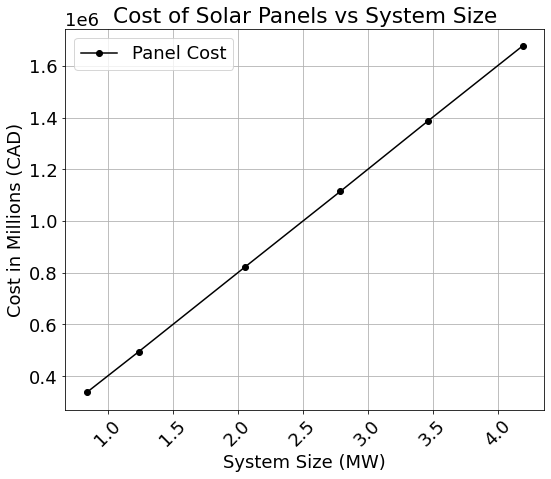

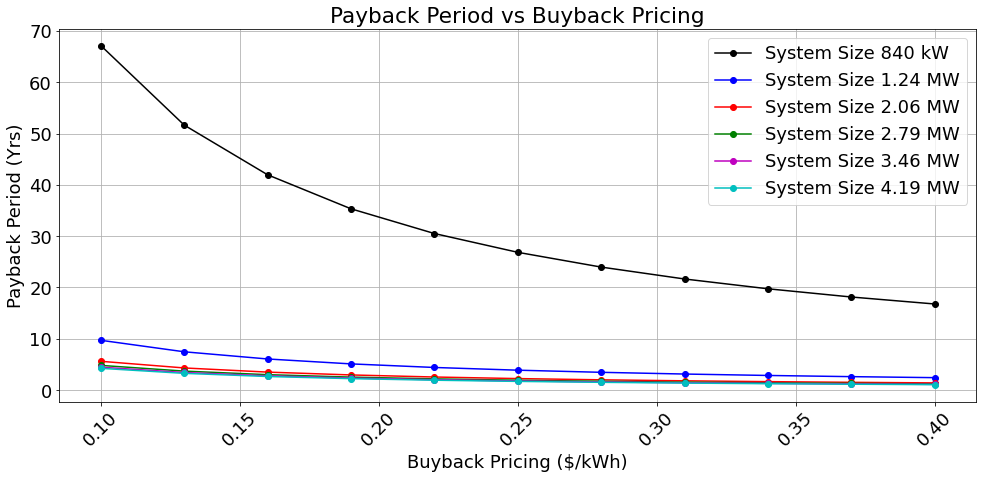

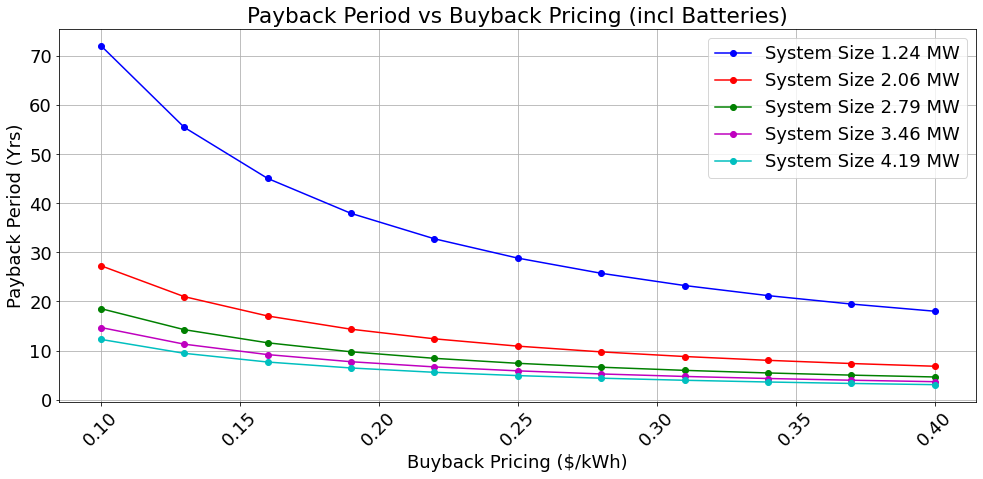

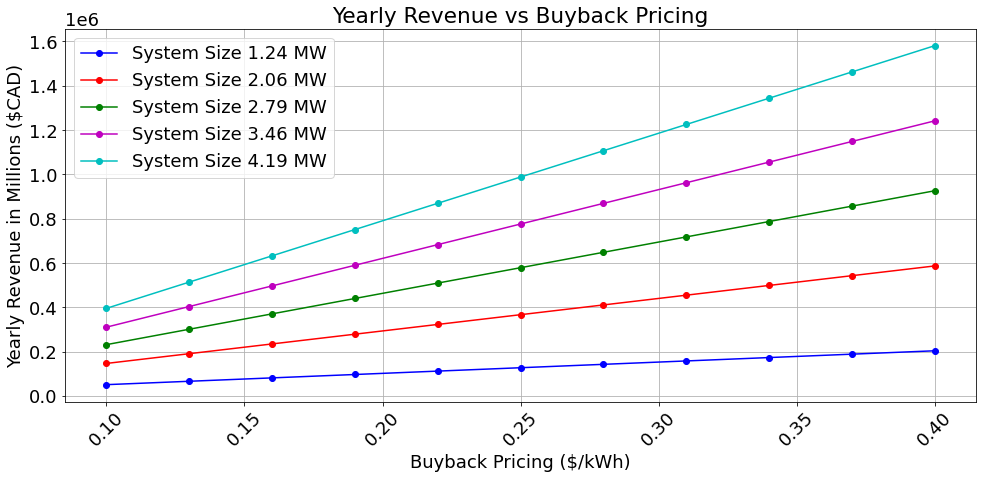

In [11]:
#Plot of the total cost of the solar panels for each configuration
fig, ax1 = plt.subplots(figsize=(8, 7))
plt.title('Cost of Solar Panels vs System Size')
plt.xlabel('System Size (MW)')
plt.ylabel('Cost in Millions (CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(config, totCost, marker='o', linestyle='-', color='k', label='Panel Cost')

plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, payback1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, payback2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, payback3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, payback4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, payback5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, payback6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing (incl Batteries)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

#ax1.plot(buyback, newPayback1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, newPayback2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, newPayback3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, newPayback4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, newPayback5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, newPayback6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




#Plot of the yearly revenue for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Yearly Revenue vs Buyback Pricing')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Yearly Revenue in Millions ($CAD)')
plt.xticks(rotation=45)
plt.grid(True)

#ax1.plot(buyback, rev1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rev2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, rev3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, rev4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, rev5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, rev6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


